In [ ]:
import sys
import warnings

warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
    sys.path.append('..')
    !pip install easyagent
    


In [1]:
import easyagents.agents
easyagents.agents.seed=0
    
from easyagents.agents import get_backends, DqnAgent, RandomAgent, PpoAgent, ReinforceAgent
from easyagents.callbacks import log, plot, duration

print(easyagents.__version__)
print(get_backends())

c:\dev\github\easyagents\env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))



  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


1.1.20
['default', 'tfagents', 'tensorforce', 'kerasrl']


Using TensorFlow backend.


In [5]:
backend='kerasrl'
easyagents.callbacks.plot.on_play_end_clear_jupyter_display: bool = False
easyagents.callbacks.plot.on_train_end_clear_jupyter_display: bool = True

### Random

In [ ]:
randomAgent = RandomAgent('CartPole-v0', backend=backend)
randomAgent.train()

In [ ]:
randomAgent = RandomAgent('CartPole-v0', backend=backend)
randomAgent.play()

### Dqn

Wall time: 1.5 s


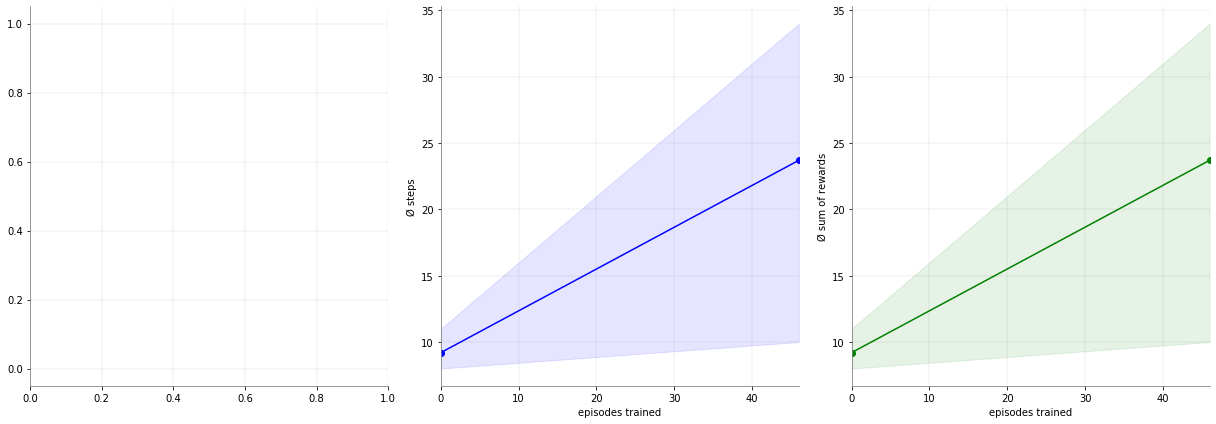

In [3]:
%%time
dqnAgent = DqnAgent('CartPole-v0',backend=backend)
dqnAgent.train(num_iterations=1000)


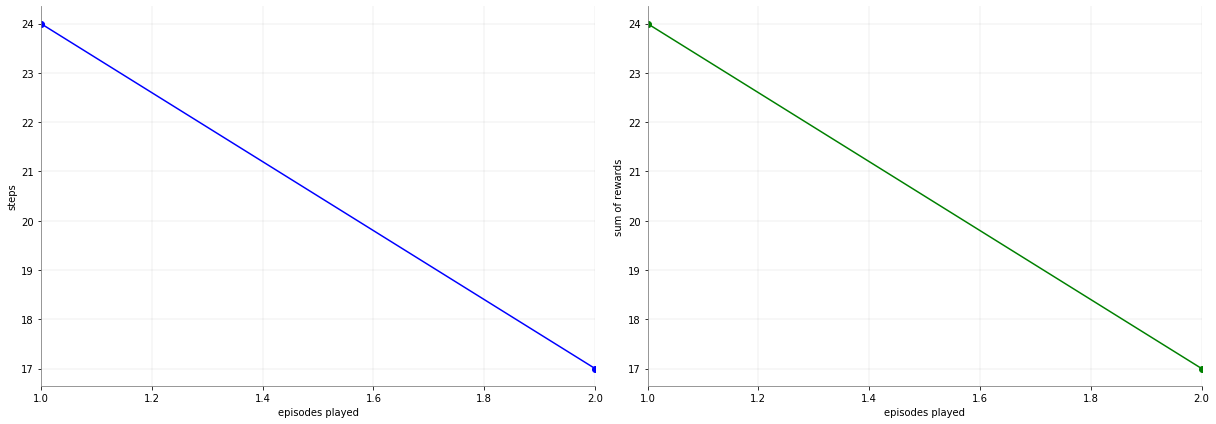

In [6]:
dqnAgent.play(num_episodes=2)

### Ppo

In [ ]:
%%time

ppoAgent = PpoAgent('CartPole-v0', backend=backend)
ppoAgent.train(num_iterations=10)

In [ ]:
ppoAgent.play(num_episodes=3)

### Reinforce

In [ ]:
%%time

reinforceAgent = ReinforceAgent('CartPole-v0', backend=backend)
reinforceAgent.train(num_iterations=10)

In [ ]:
reinforceAgent.play(num_episodes=3)